# ** AirlineCustomer Service**

# Predicting Airline Passenger Satisfaction

Using Machine Learning : A Data-Driven Approach to Enhancing Customer Experience

In the competitive airline industry, understanding customer satisfaction is essential for improving service quality and retaining loyal passengers. This project aims to develop a machine learning model that predicts whether a customer is "Satisfied" or "Neutral/Unhappy" based on various factors including demographic details, travel characteristics, and service-related ratings such as booking ease, inflight service, cleanliness, entertainment, and more. By identifying the key drivers of satisfaction, airlines can take proactive steps to enhance passenger experiences, optimize operations, and make informed, data-driven decisions to improve overall customer engagement.

Business Goal:
Improve overall customer experience by identifying pain points.

Predict customer satisfaction to proactively address service gaps.

Segment customers based on their likelihood of satisfaction for targeted service improvements.


# IMPORTING LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ast import increment_lineno
# imort lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from joblib import Parallel, delayed

%matplotlib inline
import pickle

# load the data set

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Airline Customer Service project/Data.csv",low_memory=False)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
# info gives details about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  object 
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
# checking the class imbalance in data.
df['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,73452
Satisfied,56428


In [ ]:
df.shape

(129880, 24)

In [ ]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [ ]:
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


# droping Id

In [ ]:
df= df.drop(df.iloc[:, [0]], axis=1)

In [ ]:
df.nunique()

,0
Gender,2
Age,75
Customer Type,2
Type of Travel,2
Class,3
Flight Distance,3824
Departure Delay,466
Arrival Delay,472
Departure and Arrival Time Convenience,6
Ease of Online Booking,6


# Analysis of the columns : Statistical Summary of  data

In [ ]:
df.describe()

,Age,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df['Flight Distance'].dtype


dtype('O')

# converting str to numerical data type and replacing "$" ,"" to empty str

In [ ]:
df['Flight Distance'] = pd.to_numeric(df['Flight Distance'].str.replace('$', ''), errors='coerce')

# EDA : Exploratory Data Analysis

# For Numeric columns

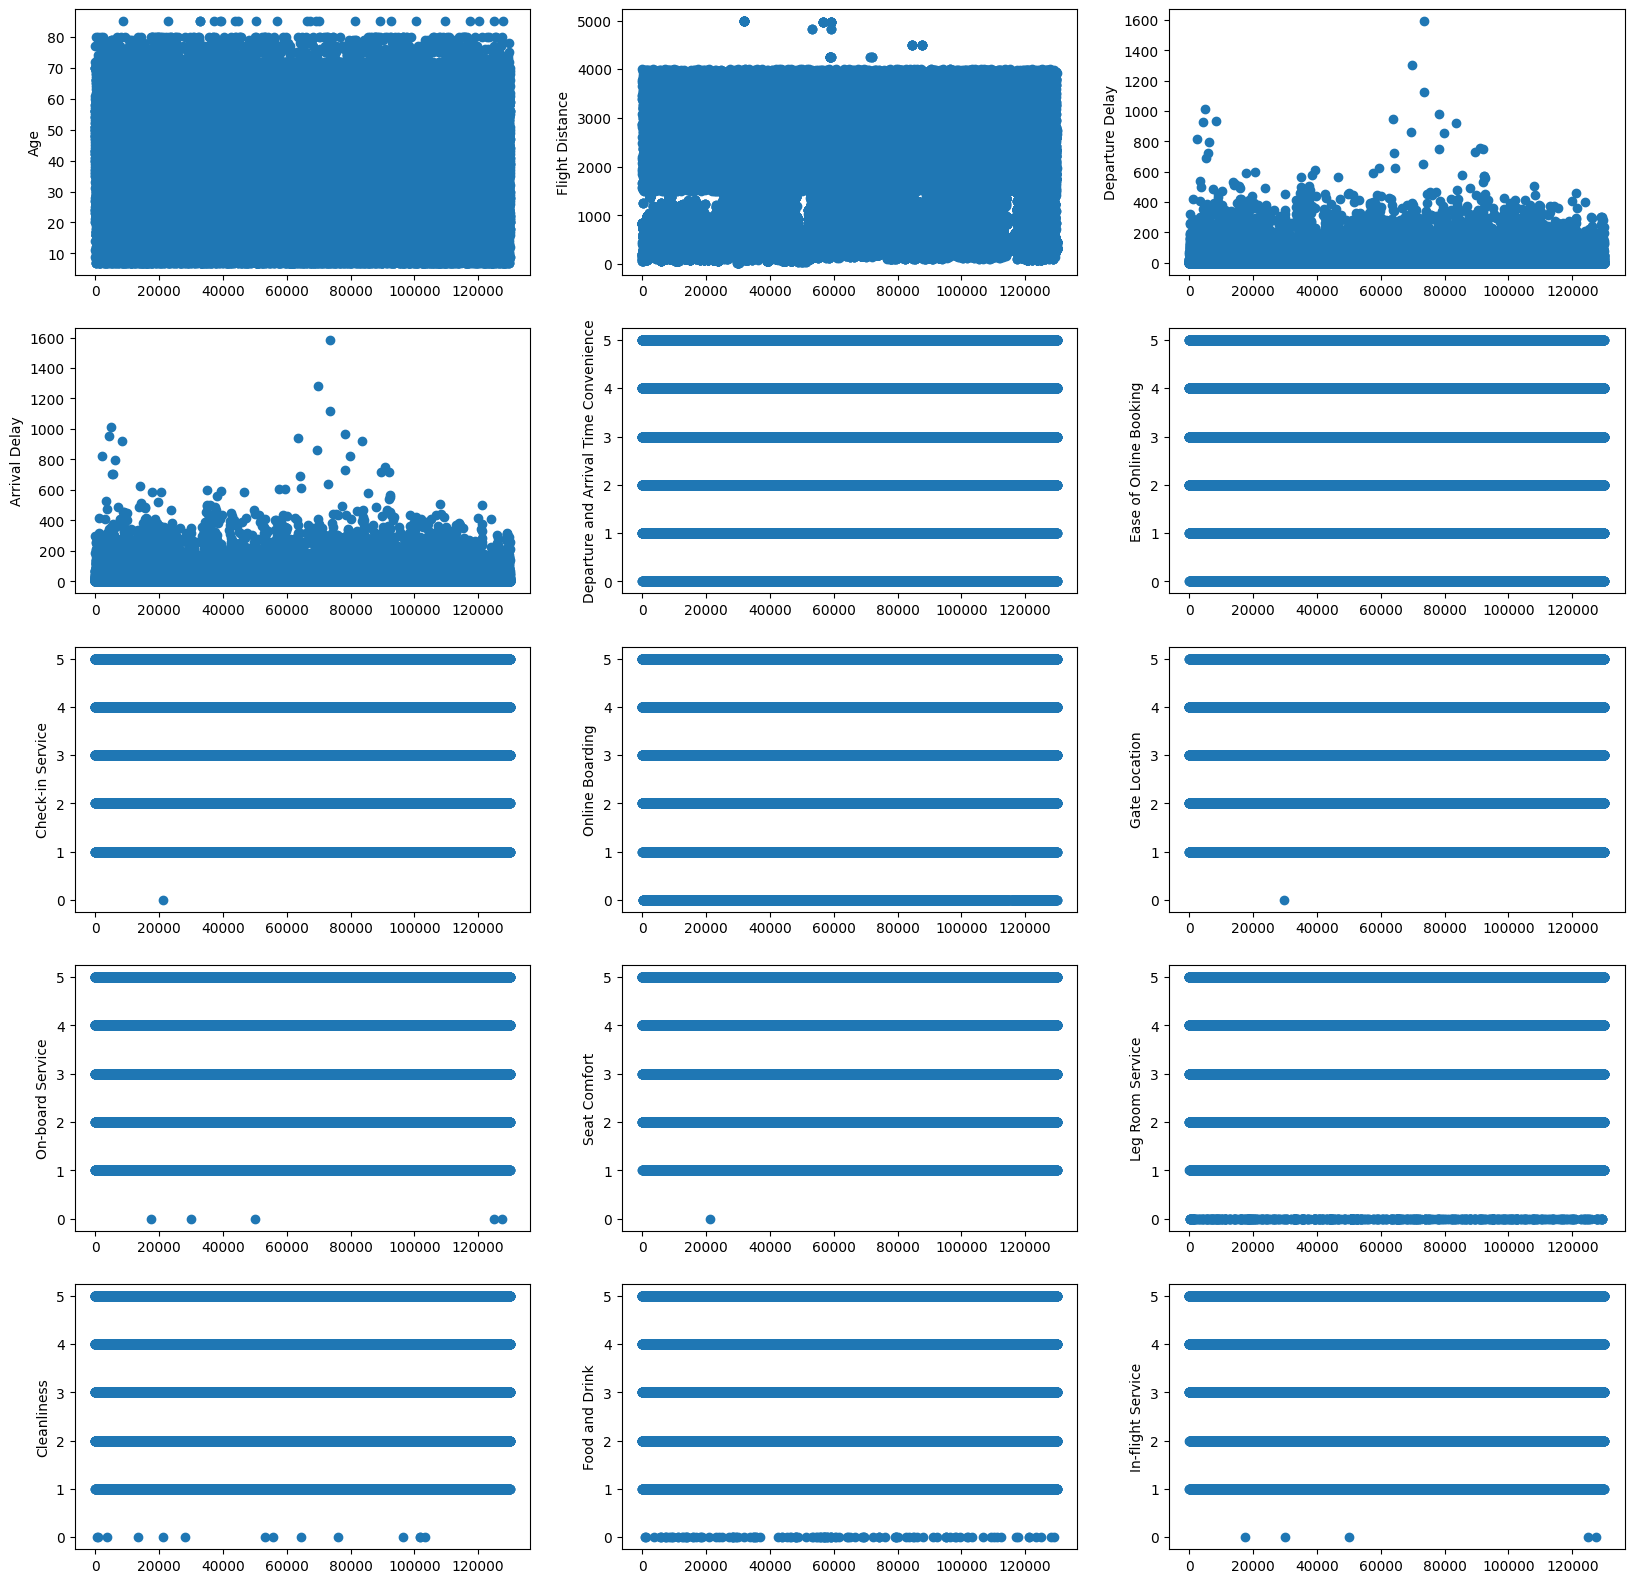

In [ ]:
numeric_cols = df.select_dtypes(include = np.number) ### selects numeric columns


column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 5
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

# For Categorical columns

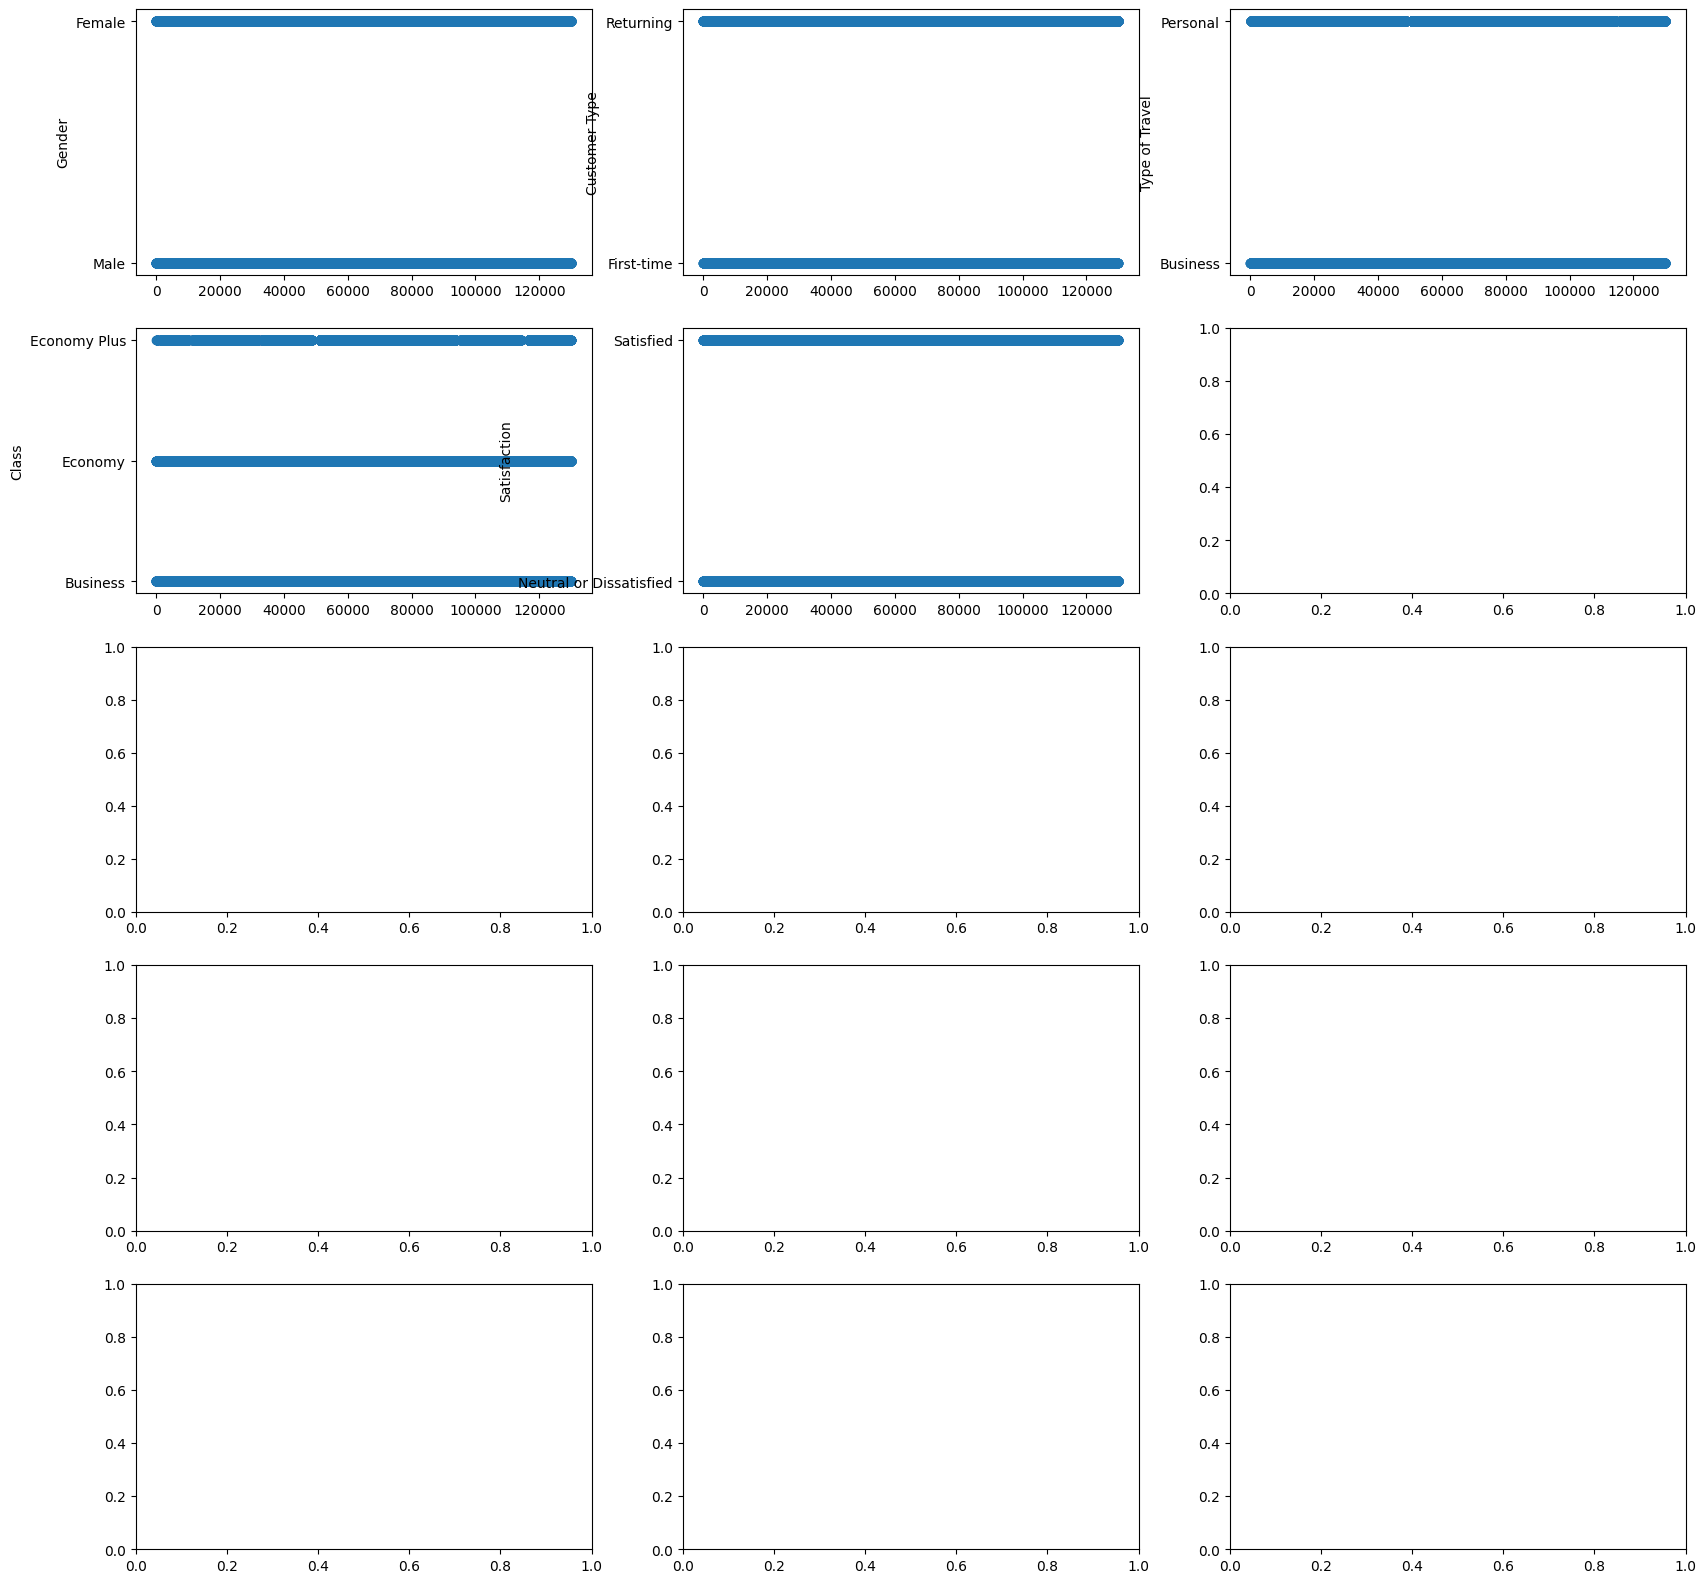

In [ ]:
categorical_cols = df.select_dtypes(exclude=np.number) ### select cat_columns
column_names = ["Gender","Customer Type","Type of Travel","Class","Satisfaction"]

col_index = 0

plot_rows = 5
plot_cols = 3
num_subplots = plot_rows * plot_cols

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        if col_index >= len(column_names):
            break
        ax[row_count][col_count].scatter(y = categorical_cols[column_names[col_index]],x=categorical_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [ ]:
df.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821.0,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821.0,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853.0,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905.0,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470.0,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df.tail(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,Male,28,Returning,Personal,Economy Plus,447.0,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308.0,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337.0,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337.0,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,Female,20,Returning,Personal,Economy Plus,337.0,0,0.0,1,3,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [ ]:
df['Departure Delay'].value_counts()

,count
Departure Delay,
0,73356
1,3682
2,2855
3,2535
4,2309
...,...
921,1
581,1
345,1


In [ ]:
df['Departure Delay'].unique()

array([   2,   26,    0,   13,   20,   16,   68,    4,   12,    6,   22,
         23,   59,   30,   29,   40,    1,   19,  151,    7,   10,  324,
         50,   45,  254,   72,  101,   18,   27,   96,   60,  104,   32,
         11,  183,   38,    3,  103,   88,   42,   54,  115,   56,  265,
         66,  117,   58,   41,  166,   44,   55,   49,  134,   52,   31,
         36,   15,   39,   95,  128,   21,   65,   17,    9,   25,  192,
         14,   82,  116,   35,  193,   51,   80,  158,   92,  165,   74,
         43,  123,   62,    5,   33,   34,   70,   48,   24,   63,   37,
         61,   47,    8,   28,  112,   46,  212,   78,   71,  102,  175,
         57,  127,  161,  195,  168,   81,   93,   98,   73,  200,  140,
        423,  291,  108,  244,  146,  124,  176,  100,  135,   75,   69,
        164,   79,   84,  184,   83,   67,  109,  118,   86,  131,  133,
        137,   53,  815,   94,   77,   85,  264,  267,   76,  174,  111,
        110,  145,  227,   64,  180,  240,  105,  1

In [ ]:
df['Arrival Delay'].value_counts()

,count
Arrival Delay,
0.0,72753
1.0,2747
2.0,2587
3.0,2442
4.0,2373
...,...
425.0,1
454.0,1
555.0,1


#

In [ ]:
df['Arrival Delay'].isnull().sum()

np.int64(393)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129879 non-null  float64
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [ ]:
df['Age'].unique()

array([48, 35, 41, 50, 49, 43, 60, 38, 28, 27, 24,  9, 52, 70, 61, 11, 42,
       14, 56, 77, 51, 47, 58, 40, 21, 33, 39, 54, 46, 45, 23, 20, 44, 37,
       36, 57, 31, 53, 25, 55, 72, 19, 65, 32, 80,  7, 34, 18, 12, 26, 17,
       66, 68, 67, 59, 69, 16, 22, 64, 29, 10, 71, 30, 62, 63,  8, 15, 73,
       78, 74, 79, 13, 76, 75, 85])

In [ ]:
df.isnull().sum() * 100 /df.shape[0]

,0
Gender,0.000000
Age,0.000000
Customer Type,0.000000
Type of Travel,0.000000
Class,0.000000
Flight Distance,0.000770
Departure Delay,0.000000
Arrival Delay,0.302587
Departure and Arrival Time Convenience,0.000000
Ease of Online Booking,0.000000


# Finding Outliers using Boxplot

<Axes: >

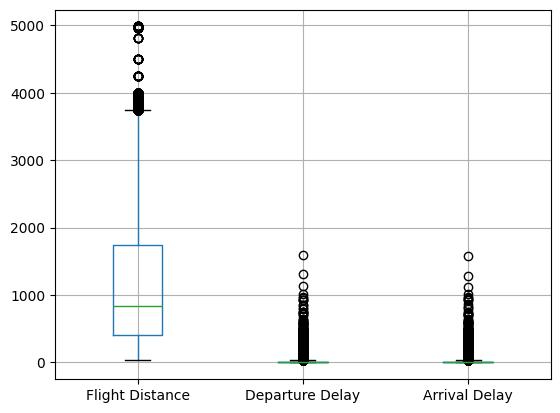

In [ ]:
df.boxplot(column=['Flight Distance','Departure Delay','Arrival Delay'])

In [ ]:
df['Flight Distance'].unique()

array([ 821.,  853., 1905., ..., 1019., 1161., 1051.])

In [ ]:
df['Flight Distance'].value_counts()

,count
Flight Distance,
337.0,841
594.0,505
404.0,480
862.0,473
2475.0,470
...,...
1336.0,1
1078.0,1
1019.0,1


# Flittering outliers

In [ ]:
cols = ['Flight Distance', 'Departure Delay', 'Arrival Delay']


def copy_df(df):
    return df.copy()
def outliers(df,column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    return df[df[column].between(Q1,Q3,inclusive = 'both')]

df = (df.pipe(copy_df)
              .pipe(outliers,cols[0])
              .pipe(outliers,cols[1])
              .pipe(outliers,cols[2]))

<Axes: >

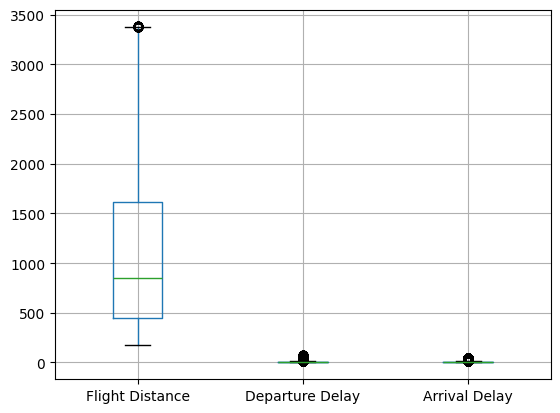

In [ ]:
df.boxplot(column=['Flight Distance','Departure Delay','Arrival Delay'])

In [ ]:
df['Satisfaction'].value_counts()

,count
Satisfaction,
Neutral or Dissatisfied,60354
Satisfied,45070


In [ ]:
df.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821.0,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821.0,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853.0,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905.0,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
6,Male,43,Returning,Business,Business,1963.0,0,0.0,3,3,...,5,5,5,4,5,5,3,5,5,Satisfied


# Data cleaning
## missing value treatment

In [ ]:
df['Arrival Delay']=df["Arrival Delay"].fillna(df["Arrival Delay"].mean())
df['Flight Distance']=df["Flight Distance"].fillna(df["Flight Distance"].mean())

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0
Ease of Online Booking,0


In [ ]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [ ]:
df['Satisfaction'].replace({'Neutral or Dissatisfied':0,'Satisfied':1},inplace=True)

<ipython-input-36-7dcf53d9394a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction'].replace({'Neutral or Dissatisfied':0,'Satisfied':1},inplace=True)
<ipython-input-36-7dcf53d9394a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Satisfaction'].replace({'Neutral or Dissatisfied'

In [ ]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821.0,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,Female,35,Returning,Business,Business,821.0,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,Male,41,Returning,Business,Business,853.0,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,Male,50,Returning,Business,Business,1905.0,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
6,Male,43,Returning,Business,Business,1963.0,0,0.0,3,3,...,5,5,5,4,5,5,3,5,5,1


In [ ]:
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000,105424.00000,105424.000000,105424.000000,105424.000000,105424.000000,105424.000000
mean,39.204735,1113.219580,5.830447,5.700599,3.068884,2.765196,3.317945,3.246414,2.975347,3.386506,3.435745,3.337570,3.281568,3.20484,3.659774,2.734377,3.345510,3.637511,0.427512
std,15.218121,827.785557,11.190207,10.369571,1.526770,1.390880,1.261573,1.344647,1.274638,1.284989,1.322383,1.317826,1.314047,1.32981,1.169624,1.325342,1.339024,1.178928,0.494720
min,7.000000,177.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,447.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.00000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,51.000000,1618.250000,7.000000,7.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000,5.000000,1.000000
max,85.000000,3380.000000,77.000000,46.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,1.000000


# Identifing categorical, numerical, and categorical-but-cardinal variables in a dataframe

In [ ]:
def all_col_names(dataframe, cat_th=10, car_th=20):
    """
    Identifies categorical, numerical, and categorical-but-cardinal variables in a dataframe.

    Parameters:
        dataframe: DataFrame
            The dataset to analyze.
        cat_th: int, optional (default=10)
            Threshold for treating numeric variables as categorical.
        car_th: int, optional (default=20)
            Threshold for treating categorical variables as cardinal.

    Returns:
        tuple: (cat_cols, num_cols, cat_but_car)
            Lists of categorical, numerical, and cardinal categorical variables.
    """

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "O"]

    cat_cols = [col for col in cat_cols + num_but_cat if col not in cat_but_car]
    num_cols = [col for col in dataframe.select_dtypes(exclude="O").columns if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}, Variables: {dataframe.shape[1]}")
    print(f"Categorical: {len(cat_cols)}, Numerical: {len(num_cols)}, Cardinal: {len(cat_but_car)}")

    return cat_cols, num_cols, cat_but_car


In [ ]:
cat_cols,num_cols,cat_but_car = all_col_names(df)

Observations: 105424, Variables: 23
Categorical: 19, Numerical: 4, Cardinal: 0


# Feature Engineering

In [ ]:
df.groupby('Gender').agg({'Satisfaction':['mean','count']})

Satisfaction       
               mean  count
Gender                    
Female     0.421408  53447
Male       0.433788  51977

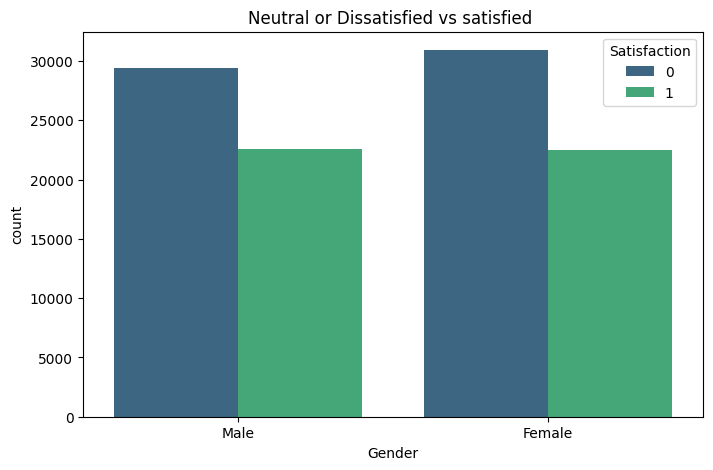

In [ ]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender",hue="Satisfaction", data=df, palette="viridis")

# Adding labels
plt.title("Neutral or Dissatisfied vs satisfied ")

# Show plot
plt.show()


In [ ]:
df.groupby('Customer Type').agg({'Satisfaction':['mean','count']})

Satisfaction       
                      mean  count
Customer Type                    
First-time        0.248447  19964
Returning         0.469342  85460

In [ ]:
df.groupby('Type of Travel').agg({'Satisfaction':['mean','count']})

Satisfaction       
                       mean  count
Type of Travel                    
Business           0.580974  71313
Personal           0.106681  34111

In [ ]:
df.groupby('Class').agg({'Satisfaction':['mean','count']})


Satisfaction       
                     mean  count
Class                           
Business         0.693850  49087
Economy          0.186986  48549
Economy Plus     0.248202   7788

In [ ]:
# Generating new variables from gender variable and customer type

df.loc[(df['Gender']== 'Male') & (df['Customer Type'] == 'First-time'), 'new_cus_Gender'] = "Male Loyal"
df.loc[(df['Gender']== 'Female') & (df['Customer Type'] == 'First-time'), 'new_cus_Gender'] = "Female Loyal"

df.loc[(df['Gender']== 'Male') & (df['Customer Type'] == 'Returning'), 'new_cus_Gender'] = "Male Loyal"
df.loc[(df['Gender']== 'Female') & (df['Customer Type'] == 'Returning'), 'new_cus_Gender'] = "Female Loyal"




In [ ]:
# Generating new age groups variables
df.loc[(df['Age'] >= 7) & (df['Age'] < 25) , 'New_Age'] = "Young"
df.loc[(df['Age'] >= 25) & (df['Age'] < 40) , 'New_Age'] = "Mature"
df.loc[(df['Age'] >= 40) & (df['Age'] < 65) , 'New_Age'] = "Mid_age"
df.loc[(df['Age'] >= 65) & (df['Age'] < 95) , 'New_Age'] = "Old_age"

In [ ]:
df.groupby("New_Age").agg({"Satisfaction": ["mean" , "count"]})

Satisfaction       
                mean  count
New_Age                    
Mature      0.384310  32021
Mid_age     0.544127  47783
Old_age     0.181524   4947
Young       0.283752  20673

In [ ]:
# combining age group with Gender

df.loc[(df['New_Age']== 'young') & (df['Gender'] == 'Male'), 'New_Age_Gender'] = "Young Male"
df.loc[(df['New_Age']== 'young') & (df['Gender'] == 'Female'), 'New_Age_Gender'] = "Young Female"

df.loc[(df['New_Age']== 'Mature') & (df['Gender'] == 'Male'), 'New_Age_Gender'] = "Mature Male"
df.loc[(df['New_Age']== 'Mature') & (df['Gender'] == 'Female'), 'New_Age_Gender'] = "Mature Female"

df.loc[(df['New_Age']== 'Mid_age') & (df['Gender'] == 'Male'), 'New_Age_Gender'] = "Mid_age Male"
df.loc[(df['New_Age']== 'Mid_age') & (df['Gender'] == 'Female'), 'New_Age_Gender'] = "Mid_age Female"

df.loc[(df['New_Age']== 'Old_age') & (df['Gender'] == 'Male'), 'New_Age_Gender'] = "Old_age Male"
df.loc[(df['New_Age']== 'Old_age') & (df['Gender'] == 'Female'), 'New_Age_Gender'] = "Old_age Female"



In [ ]:
df.groupby("New_Age_Gender").agg({"Satisfaction": ["mean" , "count"]})

Satisfaction       
                       mean  count
New_Age_Gender                    
Mature Female      0.374777  16247
Mature Male        0.394130  15774
Mid_age Female     0.541618  24004
Mid_age Male       0.546659  23779
Old_age Female     0.175859   2502
Old_age Male       0.187321   2445

In [ ]:
# Generating new variables from type of travel and customer type variables

df.loc[(df['Type of Travel'] == 'Business') & (df['Customer Type'] == 'First-time'),"New_Travel_Type"] ="Business Frist Time"
df.loc[(df['Type of Travel'] == 'Personal') & (df['Customer Type'] == 'First-time'),"New_Travel_Type"] ="Personal First-time"


df.loc[(df['Type of Travel'] == 'Business') & (df['Customer Type'] == 'Returning'),"New_Travel_Type"] ="Business Returning"
df.loc[(df['Type of Travel'] == 'Personal') & (df['Customer Type'] == 'Returning'),"New_Travel_Type"] ="Personal Returning"


In [ ]:
df.groupby("New_Travel_Type").agg({"Satisfaction": ["mean" , "count"]})

Satisfaction       
                            mean  count
New_Travel_Type                        
Business Frist Time     0.249154  19791
Business Returning      0.708435  51522
Personal First-time     0.167630    173
Personal Returning      0.106370  33938

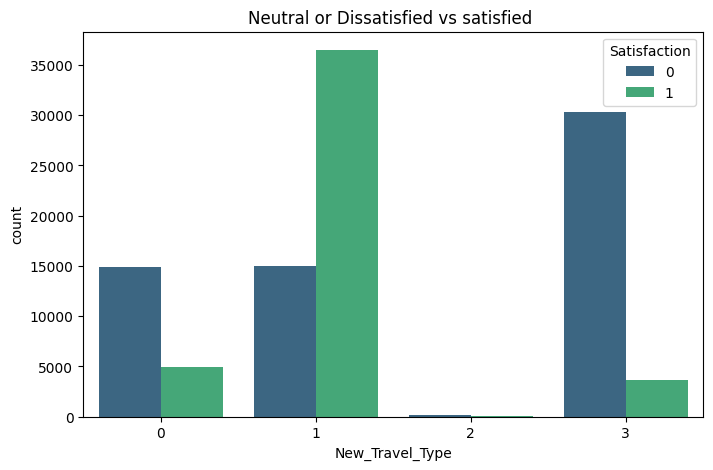

In [ ]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x="New_Travel_Type",hue="Satisfaction", data=df, palette="viridis")

# Adding labels
plt.title("Neutral or Dissatisfied vs satisfied ")

# Show plot
plt.show()

In [ ]:
# Generating a new variable with New_Travel_Type based on gender breakdown
df.loc[(df["New_Travel_Type"] == "Business Frist Time") & (df["Gender"] == "Male"),"New_Travel_Gender"] = "Business Frist Time Male"
df.loc[(df["New_Travel_Type"] == "Business Frist Time") & (df["Gender"] == "Female"),"New_Travel_Gender"] = "Business Frist Time Female"

df.loc[(df["New_Travel_Type"] == "Personal First-time") & (df["Gender"] == "Male"),"New_Travel_Gender"] = "Personal First-time Male"
df.loc[(df["New_Travel_Type"] == "Personal First-time") & (df["Gender"] == "Female"),"New_Travel_Gender"] = "Personal First-time Female"

df.loc[(df["New_Travel_Type"] == "Business Returning") & (df["Gender"] == "Male"),"New_Travel_Gender"] = "Business Returning Male"
df.loc[(df["New_Travel_Type"] == "Business Returning") & (df["Gender"] == "Female"),"New_Travel_Gender"] = "Business Returning Female"

df.loc[(df["New_Travel_Type"] == "Personal Returning") & (df["Gender"] == "Male"),"New_Travel_Gender"] = "Personal Returning Male"
df.loc[(df["New_Travel_Type"] == "Personal Returning") & (df["Gender"] == "Female"),"New_Travel_Gender"] = "Personal Returning Female"


In [ ]:
df.groupby("New_Travel_Gender").agg({"Satisfaction": ["mean" , "count"]})

Satisfaction       
                                   mean  count
New_Travel_Gender                             
Business Frist Time Female     0.238224  10742
Business Frist Time Male       0.262128   9049
Business Returning Female      0.706347  25697
Business Returning Male        0.710513  25825
Personal First-time Female     0.146067     89
Personal First-time Male       0.190476     84
Personal Returning Female      0.106389  16919
Personal Returning Male        0.106352  17019

In [ ]:
# Generating a new variable with New_Travel_Type in class
df.loc[(df["New_Travel_Type"] == "Business Frist Time") & (df["Class"] == "Business"),"New_Travel_Class"] = "Business Frist Time Business"
df.loc[(df["New_Travel_Type"] == "Business Frist Time") & (df["Class"] == "Economy"),"New_Travel_Class"] = "Business Frist Time Economy"
df.loc[(df["New_Travel_Type"] == "Business Frist Time") & (df["Class"] == "Economy Plus"),"New_Travel_Class"] = "Business Frist Time Economy Plus"

df.loc[(df["New_Travel_Type"] == "Personal First-time") & (df["Class"] == "Business"),"New_Travel_Class"] = "Personal Frist Time Business"
df.loc[(df["New_Travel_Type"] == "Personal Frist Time") & (df["Class"] == "Economy"),"New_Travel_Class"] = "Personal Frist Time Economy"
df.loc[(df["New_Travel_Type"] == "Personal Frist Time") & (df["Class"] == "Economy Plus"),"New_Travel_Class"] = "Personal Frist Time Economy Plus"

df.loc[(df["New_Travel_Type"] == "Business Returning") & (df["Class"] == "Business"),"New_Travel_Class"] = "Business Returning Business"
df.loc[(df["New_Travel_Type"] == "Business Returning") & (df["Class"] == "Economy"),"New_Travel_Class"] = "Business Returning Economy"
df.loc[(df["New_Travel_Type"] == "Business Returning") & (df["Class"] == "Economy Plus"),"New_Travel_Class"] = "Business Returning Economy Plus"

df.loc[(df["New_Travel_Type"] == "Personal Returning") & (df["Class"] == "Business"),"New_Travel_Class"] = "Personal Returning Business"
df.loc[(df["New_Travel_Type"] == "Personal Returning") & (df["Class"] == "Economy"),"New_Travel_Class"] = "Personal Returning Economy"
df.loc[(df["New_Travel_Type"] == "Personal Returning") & (df["Class"] == "Economy Plus"),"New_Travel_Class"] = "Personal Returning Economy Plus"


In [ ]:
df.groupby("New_Travel_Class").agg({"Satisfaction": ["mean" , "count"]})

Satisfaction       
                                         mean  count
New_Travel_Class                                    
Business Frist Time Business         0.400645   8067
Business Frist Time Economy          0.149058  10989
Business Frist Time Economy Plus     0.082993    735
Business Returning Business          0.788663  38739
Business Returning Economy           0.464727   9554
Business Returning Economy Plus      0.467018   3229
Personal Frist Time Business         0.000000     10
Personal Returning Business          0.121092   2271
Personal Returning Economy           0.106702  27844
Personal Returning Economy Plus      0.095213   3823

In [ ]:
# Creating New_delay_gap
df['New_Delay_Gap'] = abs(df['Departure Delay'] - df['Arrival Delay'])
df['New_Delay_Gap'].head()

,New_Delay_Gap
0,3.0
1,13.0
2,0.0
3,0.0
6,0.0


In [ ]:
df.groupby("New_Delay_Gap").agg({"Satisfaction": ["mean" , "count"]})

Satisfaction       
                      mean  count
New_Delay_Gap                    
0.0               0.455692  54019
1.0               0.430131   5954
2.0               0.418963   5189
3.0               0.422674   4578
4.0               0.410521   4163
5.0               0.416493   3832
6.0               0.380544   3382
7.0               0.390149   3086
8.0               0.374633   2728
9.0               0.385618   2378
10.0              0.401533   2087
11.0              0.382162   1850
12.0              0.387117   1599
13.0              0.364266   1444
14.0              0.367948   1223
15.0              0.365830   1036
16.0              0.391304    897
17.0              0.383578    816
18.0              0.361765    680
19.0              0.394604    593
20.0              0.379699    532
21.0              0.378190    431
22.0              0.366947    357
23.0              0.338843    363
24.0              0.417544    285
25.0              0.308271    266
26.0              0.324324    222
27.0              0.327869    183
28.0              0.380368    163
29.0              0.352941    153
30.0              0.365672    134
31.0              0.363636    110
32.0              0.321839     87
33.0              0.345238     84
34.0              0.333333     66
35.0              0.373134     67
36.0              0.348485     66
37.0              0.181818     44
38.0              0.377778     45
39.0              0.404762     42
40.0              0.275000     40
41.0              0.310345     29
42.0              0.371429     35
43.0              0.375000     24
44.0              0.333333     27
45.0              0.227273     22
46.0              0.363636     11
48.0              0.000000      1
54.0              0.000000      1

In [ ]:
# Creating a new variable by classifying over the Flight Distance variable

df.loc[(df['Flight Distance'] <= 1500), 'New_Distance'] = 'Short Distance'
df.loc[(df['Flight Distance'] > 1500),'New_Distance'] = 'Long Distance'

In [ ]:
df.groupby("New_Distance").agg({"Satisfaction": ["mean" , "count"]})

Satisfaction       
                       mean  count
New_Distance                      
Long Distance      0.644437  29885
Short Distance     0.341691  75539

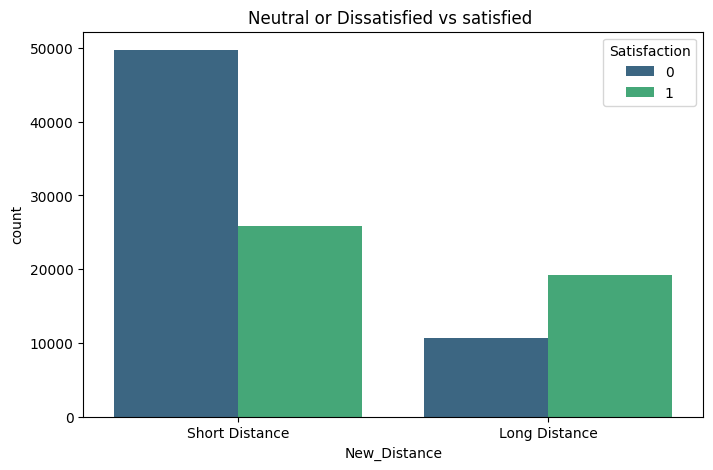

In [ ]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x="New_Distance",hue="Satisfaction", data=df, palette="viridis")
plt.title("Neutral or Dissatisfied vs satisfied ")

# Show plot
plt.show()


In [ ]:
df.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Baggage Handling,Satisfaction,new_cus_Gender,New_Age,New_Age_Gender,New_Travel_Type,New_Travel_Gender,New_Travel_Class,New_Delay_Gap,New_Distance
0,Male,48,First-time,Business,Business,821.0,2,5.0,3,3,...,5,0,Male Loyal,Mid_age,Mid_age Male,Business Frist Time,Business Frist Time Male,Business Frist Time Business,3.0,Short Distance
1,Female,35,Returning,Business,Business,821.0,26,39.0,2,2,...,5,1,Female Loyal,Mature,Mature Female,Business Returning,Business Returning Female,Business Returning Business,13.0,Short Distance
2,Male,41,Returning,Business,Business,853.0,0,0.0,4,4,...,3,1,Male Loyal,Mid_age,Mid_age Male,Business Returning,Business Returning Male,Business Returning Business,0.0,Short Distance
3,Male,50,Returning,Business,Business,1905.0,0,0.0,2,2,...,5,1,Male Loyal,Mid_age,Mid_age Male,Business Returning,Business Returning Male,Business Returning Business,0.0,Long Distance
6,Male,43,Returning,Business,Business,1963.0,0,0.0,3,3,...,5,1,Male Loyal,Mid_age,Mid_age Male,Business Returning,Business Returning Male,Business Returning Business,0.0,Long Distance


In [ ]:
# creating a new variables for the overall evaluation of inflight satisfaction
df['New_Flight_Situation']= (df["In-flight Wifi Service"] + df["Food and Drink"] + df["Seat Comfort"] + df["In-flight Entertainment"] + df["Leg Room Service"]) / 25

df.groupby("New_Flight_Situation").agg({"Satisfaction": ["mean" , "count"]})

Satisfaction      
                             mean count
New_Flight_Situation                   
0.12                     0.000000     1
0.16                     0.947368    38
0.20                     0.132420   438
0.24                     0.071669   893
0.28                     0.091932  1599
0.32                     0.103592  2394
0.36                     0.106209  3672
0.40                     0.133180  4355
0.44                     0.151986  5086
0.48                     0.182557  5538
0.52                     0.193904  6529
0.56                     0.215328  6785
0.60                     0.302580  7327
0.64                     0.374149  7930
0.68                     0.458296  8872
0.72                     0.569729  9078
0.76                     0.624248  8974
0.80                     0.661747  8334
0.84                     0.720405  7307
0.88                     0.760024  4988
0.92                     0.784574  2943
0.96                     0.876960  1658
1.00                     0.991241   685

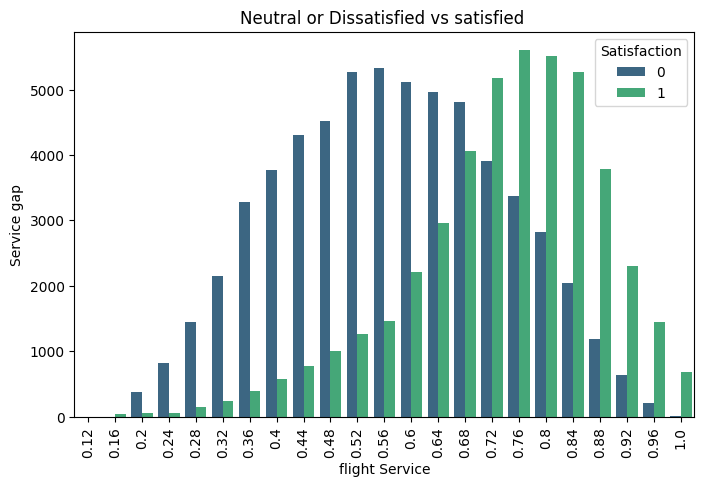

In [ ]:
# Creating a count plot
plt.figure(figsize=(8, 5))
sns.countplot(x="New_Flight_Situation",hue="Satisfaction", data=df, palette="viridis")

# Adding labels
plt.xlabel("flight Service")
plt.ylabel("Service gap")
plt.title("Neutral or Dissatisfied vs satisfied ")
plt.xticks(rotation=90)
# Show plot
plt.show()


In [ ]:
# Creating a new variable for general evaluation of operational transactions
df["NEW_OPERATIONAL"] = (df["Departure and Arrival Time Convenience"] + df["Cleanliness"] + df["Baggage Handling"] + df["Gate Location"]) / 20

df.groupby("NEW_OPERATIONAL").agg({"Satisfaction": ["mean", "count"]})

Satisfaction       
                        mean  count
NEW_OPERATIONAL                    
0.15                0.454545     11
0.20                0.165354    127
0.25                0.169604    454
0.30                0.190476   1113
0.35                0.251681   2380
0.40                0.289064   3923
0.45                0.370471   6238
0.50                0.393078   8726
0.55                0.407205  10992
0.60                0.384371  12272
0.65                0.374931  12725
0.70                0.390872  12577
0.75                0.414188  11164
0.80                0.495484   9078
0.85                0.583545   6308
0.90                0.706081   4144
0.95                0.815004   2346
1.00                0.898345    846

In [ ]:
# Creating a new variable for the general evaluation of online transactions
df["NEW_ONLINE"] = (df["Ease of Online Booking"] + df["Online Boarding"] + df["Check-in Service"]) / 15

df.groupby("NEW_ONLINE").agg({"Satisfaction": ["mean", "count"]})

Satisfaction       
                   mean  count
NEW_ONLINE                    
0.066667       0.534296    277
0.133333       0.527950    322
0.200000       0.258365   1823
0.266667       0.276333   2269
0.333333       0.142208   5506
0.400000       0.119158   6462
0.466667       0.143642  10742
0.533333       0.248145  11320
0.600000       0.324712  14653
0.666667       0.458815  13755
0.733333       0.544831  14153
0.800000       0.705183  10342
0.866667       0.785820   8138
0.933333       0.932838   3901
1.000000       0.932425   1761

In [ ]:
#  Evaluation of personnel and creation of new variables
df["New_Behavior"] = (df["On-board Service"] + df["In-flight Service"]) / 10

df.groupby("New_Behavior").agg({"Satisfaction": ["mean", "count"]})

Satisfaction       
                     mean  count
New_Behavior                    
0.0              0.000000      4
0.2              0.185232   3941
0.3              0.337913   1965
0.4              0.256480  10995
0.5              0.192576   8324
0.6              0.293835  14971
0.7              0.264308  11672
0.8              0.587326  26905
0.9              0.374207   9770
1.0              0.729454  16877

In [ ]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,New_Age_Gender,New_Travel_Type,New_Travel_Gender,New_Travel_Class,New_Delay_Gap,New_Distance,New_Flight_Situation,NEW_OPERATIONAL,NEW_ONLINE,New_Behavior
0,Male,48,First-time,Business,Business,821.0,2,5.0,3,3,...,Mid_age Male,Business Frist Time,Business Frist Time Male,Business Frist Time Business,3.0,Short Distance,0.80,0.80,0.666667,0.8
1,Female,35,Returning,Business,Business,821.0,26,39.0,2,2,...,Mature Female,Business Returning,Business Returning Female,Business Returning Business,13.0,Short Distance,0.76,0.70,0.666667,1.0
2,Male,41,Returning,Business,Business,853.0,0,0.0,4,4,...,Mid_age Male,Business Returning,Business Returning Male,Business Returning Business,0.0,Short Distance,0.80,0.80,0.866667,0.6
3,Male,50,Returning,Business,Business,1905.0,0,0.0,2,2,...,Mid_age Male,Business Returning,Business Returning Male,Business Returning Business,0.0,Long Distance,0.84,0.65,0.600000,1.0
6,Male,43,Returning,Business,Business,1963.0,0,0.0,3,3,...,Mid_age Male,Business Returning,Business Returning Male,Business Returning Business,0.0,Long Distance,0.92,0.75,0.733333,1.0


In [ ]:
cat_cols,num_cols,cat_but_car = all_col_names(df)

Observations: 105424, Variables: 35
Categorical: 26, Numerical: 9, Cardinal: 0


# Data Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(dataframe, binary_col):
    le = LabelEncoder()
    dataframe[binary_col] = le.fit_transform(dataframe[binary_col])
    return dataframe

In [ ]:
binary_cols = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() == 2]
binary_cols

['Gender', 'Customer Type', 'Type of Travel', 'new_cus_Gender', 'New_Distance']

In [ ]:
for col in binary_cols:
    df = label_encoder(df,col)

In [ ]:
non_binary_cols = [col for col in df[cat_cols] if col not in binary_cols]
non_binary_cols

['Class',
 'New_Age',
 'New_Age_Gender',
 'New_Travel_Type',
 'New_Travel_Gender',
 'New_Travel_Class',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

In [ ]:
for col in non_binary_cols:
    df = label_encoder(df,col)

In [ ]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,New_Age_Gender,New_Travel_Type,New_Travel_Gender,New_Travel_Class,New_Delay_Gap,New_Distance,New_Flight_Situation,NEW_OPERATIONAL,NEW_ONLINE,New_Behavior
0,1,48,0,0,0,821.0,2,5.0,3,3,...,3,0,1,0,3.0,1,0.80,0.80,0.666667,0.8
1,0,35,1,0,0,821.0,26,39.0,2,2,...,0,1,2,3,13.0,1,0.76,0.70,0.666667,1.0
2,1,41,1,0,0,853.0,0,0.0,4,4,...,3,1,3,3,0.0,1,0.80,0.80,0.866667,0.6
3,1,50,1,0,0,1905.0,0,0.0,2,2,...,3,1,3,3,0.0,0,0.84,0.65,0.600000,1.0
6,1,43,1,0,0,1963.0,0,0.0,3,3,...,3,1,3,3,0.0,0,0.92,0.75,0.733333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,447.0,2,3.0,4,4,...,1,3,7,9,1.0,1,0.68,0.70,0.800000,1.0
129876,1,41,1,1,2,308.0,0,0.0,5,3,...,3,3,7,9,0.0,1,0.56,0.80,0.733333,0.9
129877,1,42,1,1,2,337.0,6,14.0,5,2,...,3,3,7,9,8.0,1,0.60,0.70,0.533333,0.7
129878,1,50,1,1,2,337.0,31,22.0,4,4,...,3,3,7,9,9.0,1,0.80,0.65,0.733333,0.8


# Data scaling

In [ ]:
# Standardise for numeric variables
sd = StandardScaler()
df[num_cols] = sd.fit_transform(df[num_cols])


# Build Machine Learning Model

In [ ]:
x = df.drop(['Satisfaction'],axis = 1)
y = df['Satisfaction']

## Split Data into Train And Test data sets

In [ ]:
#
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(84339, 34) (84339,)
(21085, 34) (21085,)


In [ ]:
x_train.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,New_Age_Gender,New_Travel_Type,New_Travel_Gender,New_Travel_Class,New_Delay_Gap,New_Distance,New_Flight_Situation,NEW_OPERATIONAL,NEW_ONLINE,New_Behavior
97379,0,-0.933414,1,1,1,-0.925630,1.266252,0.703928,4,1,...,0,3,6,8,0.475804,1,-0.930909,-0.315543,-0.845915,1.363079
15477,0,-1.524817,1,1,1,-0.821738,-0.521034,-0.549746,5,1,...,6,3,6,8,-0.617049,1,-0.242713,1.322264,-1.572161,1.363079
108387,1,-1.984797,1,1,1,0.769261,-0.521034,-0.549746,3,2,...,6,3,7,8,-0.617049,0,0.445483,0.667141,-1.209038,-0.021357
42860,1,-0.801991,1,0,2,-0.948583,-0.521034,-0.549746,0,0,...,1,1,3,5,-0.617049,1,-0.472112,-1.625789,-2.661529,0.901600
69366,1,0.315104,1,0,0,-0.020802,-0.521034,-0.549746,3,5,...,3,1,3,3,-0.617049,1,0.216084,0.339580,1.332823,0.440122


In [ ]:
x_train.tail(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,New_Age_Gender,New_Travel_Type,New_Travel_Gender,New_Travel_Class,New_Delay_Gap,New_Distance,New_Flight_Situation,NEW_OPERATIONAL,NEW_ONLINE,New_Behavior
70661,0,0.117969,1,0,0,-0.804825,0.372609,-0.453309,5,2,...,2,1,2,3,0.788048,1,-0.242713,0.994703,-0.482792,-0.482836
96246,0,0.249392,1,1,1,-0.685229,3.142902,3.789895,4,2,...,2,3,6,8,0.007439,1,-0.701511,-0.315543,-1.209038,-2.328751
127932,0,-2.116220,1,1,1,1.433688,2.874809,0.800365,4,1,...,6,3,6,8,3.129876,0,0.445483,0.339580,-0.845915,0.901600
1525,0,0.512238,1,0,0,-0.152479,-0.521034,0.221746,1,1,...,2,1,2,3,0.631926,1,-1.389707,-1.953351,-0.482792,-2.328751
21284,0,0.446527,1,0,0,0.812751,-0.521034,-0.549746,3,3,...,2,1,2,3,-0.617049,0,0.445483,0.012018,0.969700,1.363079


In [ ]:
x_train.isnull().sum()

,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0
Ease of Online Booking,0


# logisticRegression

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

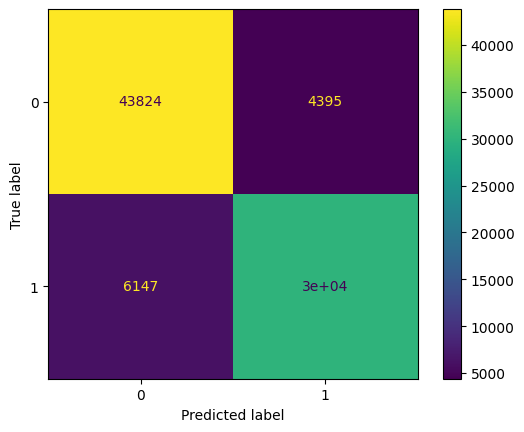

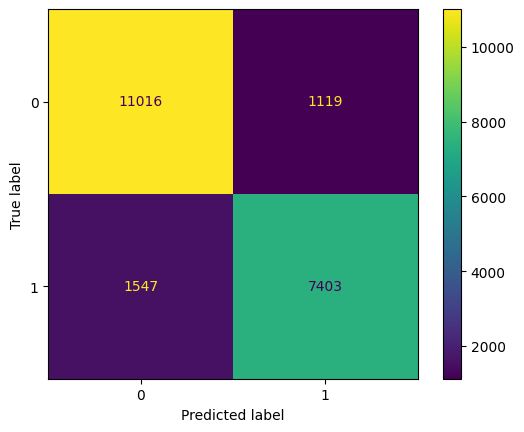

In [ ]:
tr_pred=lr.predict(x_train)
val_pred=lr.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

In [ ]:
train_f1=f1_score(y_train,tr_pred)
val_f1=f1_score(y_test,val_pred)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))

Train f1 score -0.8504426285325162
val f1 score -0.8474130036630036


In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.8735594024187812


In [ ]:
print('Classification report - ',classification_report(y_test,val_pred))

Classification report -                precision    recall  f1-score   support

           0       0.88      0.91      0.89     12135
           1       0.87      0.83      0.85      8950

    accuracy                           0.87     21085
   macro avg       0.87      0.87      0.87     21085
weighted avg       0.87      0.87      0.87     21085



In [ ]:
# logisticRegression
lr=LogisticRegression(max_iter=500,random_state=42)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500, random_state=42)

# prediction and confusion matrix

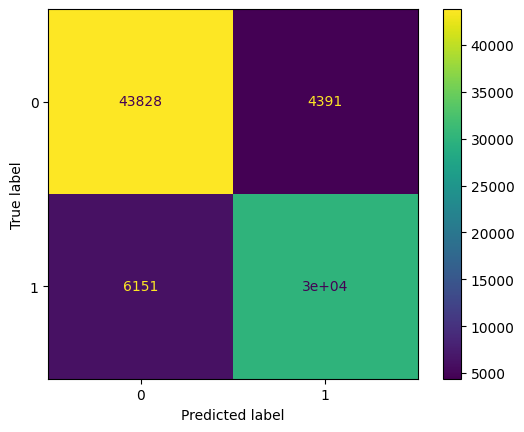

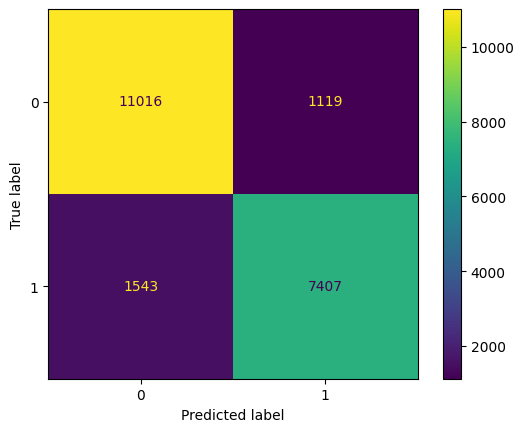

In [ ]:
tr_pred=lr.predict(x_train)
val_pred=lr.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1_SCORE

In [ ]:
train_f1=f1_score(y_train,tr_pred)
val_f1=f1_score(y_test,val_pred)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))

Train f1 score -0.8504256526674234
val f1 score -0.847676813916228


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.8737491107422338


# Classification report

In [ ]:
print('Classification report - ',classification_report(y_test,val_pred))

Classification report -                precision    recall  f1-score   support

           0       0.88      0.91      0.89     12135
           1       0.87      0.83      0.85      8950

    accuracy                           0.87     21085
   macro avg       0.87      0.87      0.87     21085
weighted avg       0.87      0.87      0.87     21085



# feature_importances of logisticRegression

In [ ]:
feature_importances = lr.coef_[0]

feature_names = lr.feature_names_in_

sorted_idx = np.argsort(np.abs(feature_importances))[::-1]

sorted_importances = [(feature_names[i], feature_importances[i]) for i in sorted_idx]

In [ ]:
sorted_importances

[('Customer Type', np.float64(2.262963825486357)),
 ('Type of Travel', np.float64(-1.4416989431871359)),
 ('Class', np.float64(-1.1226084159180687)),
 ('Gender', np.float64(0.6354379313320264)),
 ('New_Travel_Type', np.float64(-0.6204340608880127)),
 ('New_Travel_Gender', np.float64(-0.6054301904440422)),
 ('New_Flight_Situation', np.float64(0.6008461780421529)),
 ('NEW_ONLINE', np.float64(0.573059468136157)),
 ('New_Travel_Class', np.float64(0.5679309828644784)),
 ('NEW_OPERATIONAL', np.float64(0.5325448946880595)),
 ('New_Behavior', np.float64(0.5285596791599251)),
 ('Online Boarding', np.float64(0.40411110070061007)),
 ('Ease of Online Booking', np.float64(-0.3665996515088072)),
 ('Departure and Arrival Time Convenience', np.float64(-0.32376697163162127)),
 ('In-flight Wifi Service', np.float64(0.29318158809576483)),
 ('Arrival Delay', np.float64(-0.2757545524803143)),
 ('Food and Drink', np.float64(-0.1862245063432006)),
 ('new_cus_Gender', np.float64(-0.1616211946526938)),
 ('Gate

In [ ]:
lr = LogisticRegression(max_iter=1000, solver="newton-cg", class_weight={0:1.1, 1:3})

lr.fit(x_train, y_train)

LogisticRegression(class_weight={0: 1.1, 1: 3}, max_iter=1000,
                   solver='newton-cg')

# Prediction and confusion matrix

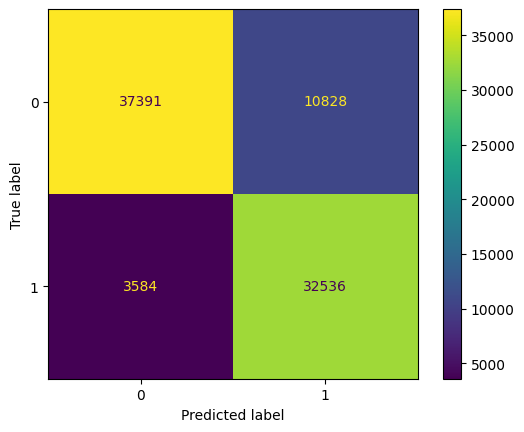

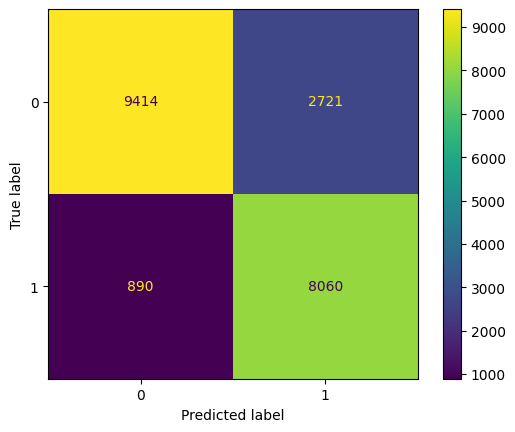

In [ ]:
tr_pred=lr.predict(x_train)
val_pred=lr.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1_SCORE

In [ ]:
train_f1=f1_score(y_train,tr_pred)
val_f1=f1_score(y_test,val_pred)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))

Train f1 score -0.8186804891550501
val f1 score -0.816988495261264


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.8287408110030827



# Classification report

In [ ]:
print('Classification report - ',classification_report(y_test,val_pred))

Classification report -                precision    recall  f1-score   support

           0       0.91      0.78      0.84     12135
           1       0.75      0.90      0.82      8950

    accuracy                           0.83     21085
   macro avg       0.83      0.84      0.83     21085
weighted avg       0.84      0.83      0.83     21085



# KNN MODEL

In [ ]:
###### K nearest neighbors ######

knn = KNeighborsClassifier(n_neighbors=2, weights="uniform", p=1)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

# Prediction and Confusion matrix

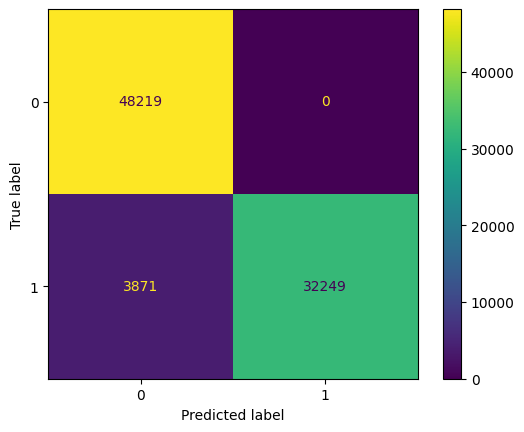

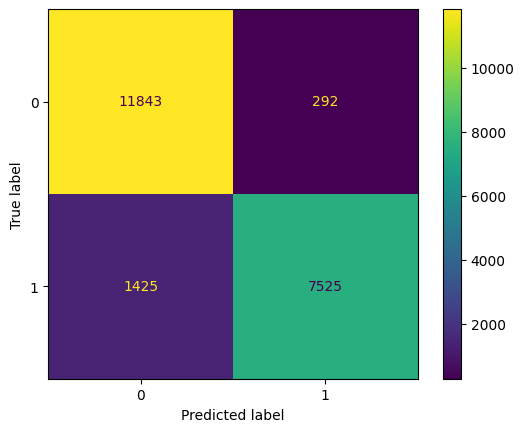

In [ ]:
tr_pred=knn.predict(x_train)
val_pred=knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1_SCORE

In [ ]:
train_f1=f1_score(y_train,tr_pred)
val_f1=f1_score(y_test,val_pred)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))

Train f1 score -0.9433807719873042
val f1 score -0.8975964692550844


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.9185677021579322


# Classification report

In [ ]:
print('Classification report - ',classification_report(y_test,val_pred))

Classification report -                precision    recall  f1-score   support

           0       0.89      0.98      0.93     12135
           1       0.96      0.84      0.90      8950

    accuracy                           0.92     21085
   macro avg       0.93      0.91      0.92     21085
weighted avg       0.92      0.92      0.92     21085



# K nearest neighbors

In [ ]:
# K nearest neighbors

knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier()

# Prediction and Confusion matrix

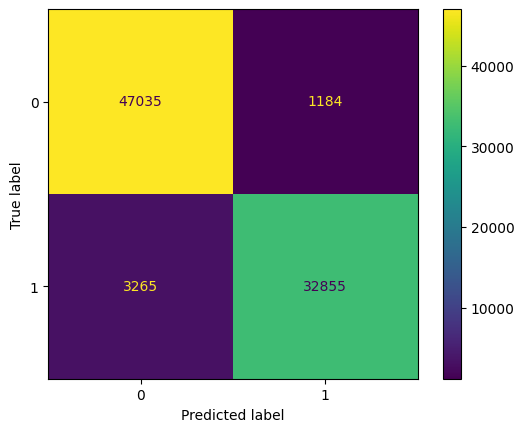

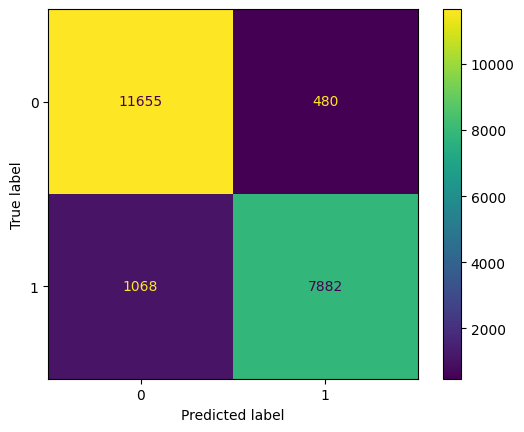

In [ ]:
tr_pred=knn.predict(x_train)
val_pred=knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1_SCORE

In [ ]:
train_f1=f1_score(y_train,tr_pred)
val_f1=f1_score(y_test,val_pred)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))

Train f1 score -0.9365868954802663
val f1 score -0.9105822550831792


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.9265828788238084


# Classification report

In [ ]:
print('Classification report - ',classification_report(y_test,val_pred))

Classification report -                precision    recall  f1-score   support

           0       0.92      0.96      0.94     12135
           1       0.94      0.88      0.91      8950

    accuracy                           0.93     21085
   macro avg       0.93      0.92      0.92     21085
weighted avg       0.93      0.93      0.93     21085



# Decision Tree with cart(gini)

In [ ]:
Dt=DecisionTreeClassifier(random_state=1,max_depth=2)
Dt.fit(x_train,y_train)
train_score=Dt.score(x_train,y_train)
test_score=Dt.score(x_test,y_test)

# Prediction and Confusion matrix

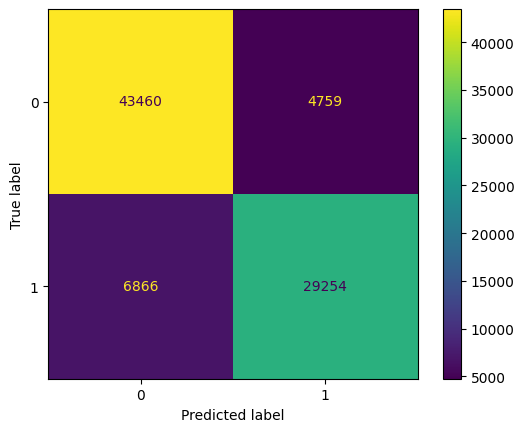

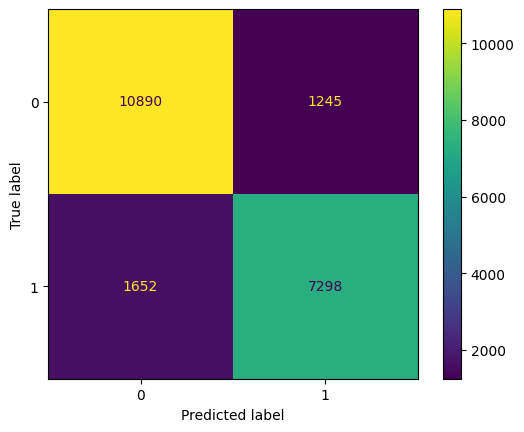

In [ ]:
tr_pred=Dt.predict(x_train)
val_pred=Dt.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1_SCORE

In [ ]:
train_f1=f1_score(y_train,tr_pred)
val_f1=f1_score(y_test,val_pred)
print('Train f1 score -{}'.format(train_f1))
print('val f1 score -{}'.format(val_f1))


Train f1 score -0.8342435087619238
val f1 score -0.8343908992168296


# Accuracy Score

In [ ]:

print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.8626037467393882


# Classification report

In [ ]:
print('Classification report :',classification_report(y_test,val_pred))

Classification report :               precision    recall  f1-score   support

           0       0.87      0.90      0.88     12135
           1       0.85      0.82      0.83      8950

    accuracy                           0.86     21085
   macro avg       0.86      0.86      0.86     21085
weighted avg       0.86      0.86      0.86     21085



# feature_importances DecisionTreeClassifier

In [ ]:
feature_importances = Dt.feature_importances_

feature_names = Dt.feature_names_in_

sorted_idx = np.argsort(Dt.feature_importances_)[::-1]

sorted_importances = [(feature_names[i], feature_importances[i]) for i in sorted_idx]

In [ ]:
sorted_importances

[('Online Boarding', np.float64(0.6419586705477213)),
 ('New_Travel_Class', np.float64(0.2543421631521706)),
 ('In-flight Wifi Service', np.float64(0.10369916630010816)),
 ('New_Behavior', np.float64(0.0)),
 ('NEW_ONLINE', np.float64(0.0)),
 ('New_Distance', np.float64(0.0)),
 ('New_Delay_Gap', np.float64(0.0)),
 ('New_Travel_Gender', np.float64(0.0)),
 ('New_Travel_Type', np.float64(0.0)),
 ('NEW_OPERATIONAL', np.float64(0.0)),
 ('New_Age_Gender', np.float64(0.0)),
 ('New_Age', np.float64(0.0)),
 ('Baggage Handling', np.float64(0.0)),
 ('new_cus_Gender', np.float64(0.0)),
 ('In-flight Entertainment', np.float64(0.0)),
 ('In-flight Service', np.float64(0.0)),
 ('Food and Drink', np.float64(0.0)),
 ('New_Flight_Situation', np.float64(0.0)),
 ('Cleanliness', np.float64(0.0)),
 ('Leg Room Service', np.float64(0.0)),
 ('On-board Service', np.float64(0.0)),
 ('Seat Comfort', np.float64(0.0)),
 ('Gate Location', np.float64(0.0)),
 ('Check-in Service', np.float64(0.0)),
 ('Ease of Online Book

# Random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

# Prediction and Confusion matrix

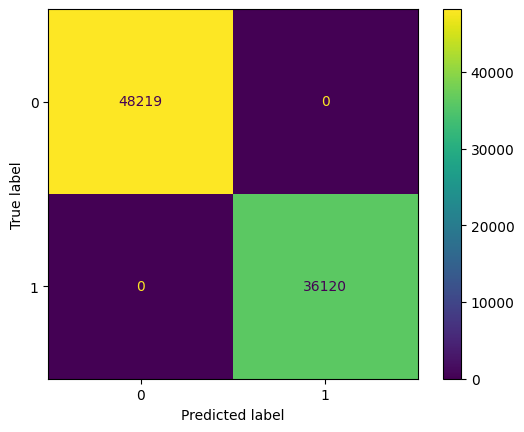

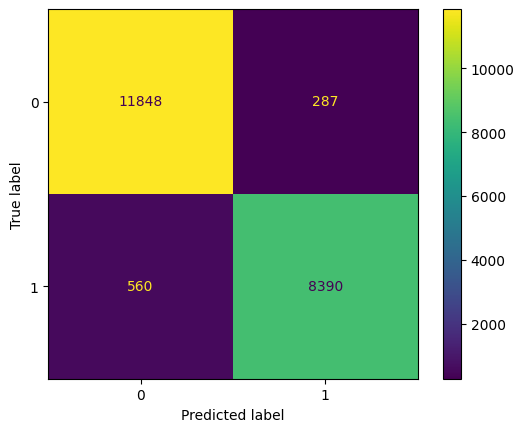

In [ ]:
tr_pred=rf.predict(x_train)
val_pred=rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1_SCORE

In [ ]:
train_f1 = f1_score(y_train,tr_pred)
val_f1 = f1_score(y_test,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 1.0
val F1 Score - 0.9519487150394281


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.9598292625088926



# Classification report

In [ ]:
print('Classification report :',classification_report(y_test,val_pred))

Classification report :               precision    recall  f1-score   support

           0       0.95      0.98      0.97     12135
           1       0.97      0.94      0.95      8950

    accuracy                           0.96     21085
   macro avg       0.96      0.96      0.96     21085
weighted avg       0.96      0.96      0.96     21085



# Feature_importances **RandomForestClassifier**

In [ ]:
feature_importances = rf.feature_importances_

feature_names = rf.feature_names_in_

sorted_idx = np.argsort(rf.feature_importances_)[::-1]

sorted_importances = [(feature_names[i], feature_importances[i]) for i in sorted_idx]

In [ ]:
sorted_importances

[('Online Boarding', np.float64(0.1418073736034419)),
 ('In-flight Wifi Service', np.float64(0.1203406719048719)),
 ('New_Travel_Class', np.float64(0.06946618623265396)),
 ('New_Travel_Gender', np.float64(0.06044661872419555)),
 ('New_Travel_Type', np.float64(0.04827117524135997)),
 ('In-flight Entertainment', np.float64(0.04342588671755233)),
 ('Type of Travel', np.float64(0.040746762652968914)),
 ('New_Flight_Situation', np.float64(0.03903852196300056)),
 ('Seat Comfort', np.float64(0.03836056976269311)),
 ('Class', np.float64(0.03644431798584587)),
 ('NEW_ONLINE', np.float64(0.03481550655106845)),
 ('Ease of Online Booking', np.float64(0.032213076580986814)),
 ('New_Behavior', np.float64(0.03136508703839253)),
 ('Customer Type', np.float64(0.023027997927952504)),
 ('Cleanliness', np.float64(0.02276770478023955)),
 ('Leg Room Service', np.float64(0.022608888688288763)),
 ('Check-in Service', np.float64(0.02091845932242815)),
 ('On-board Service', np.float64(0.019797957784684437)),
 (

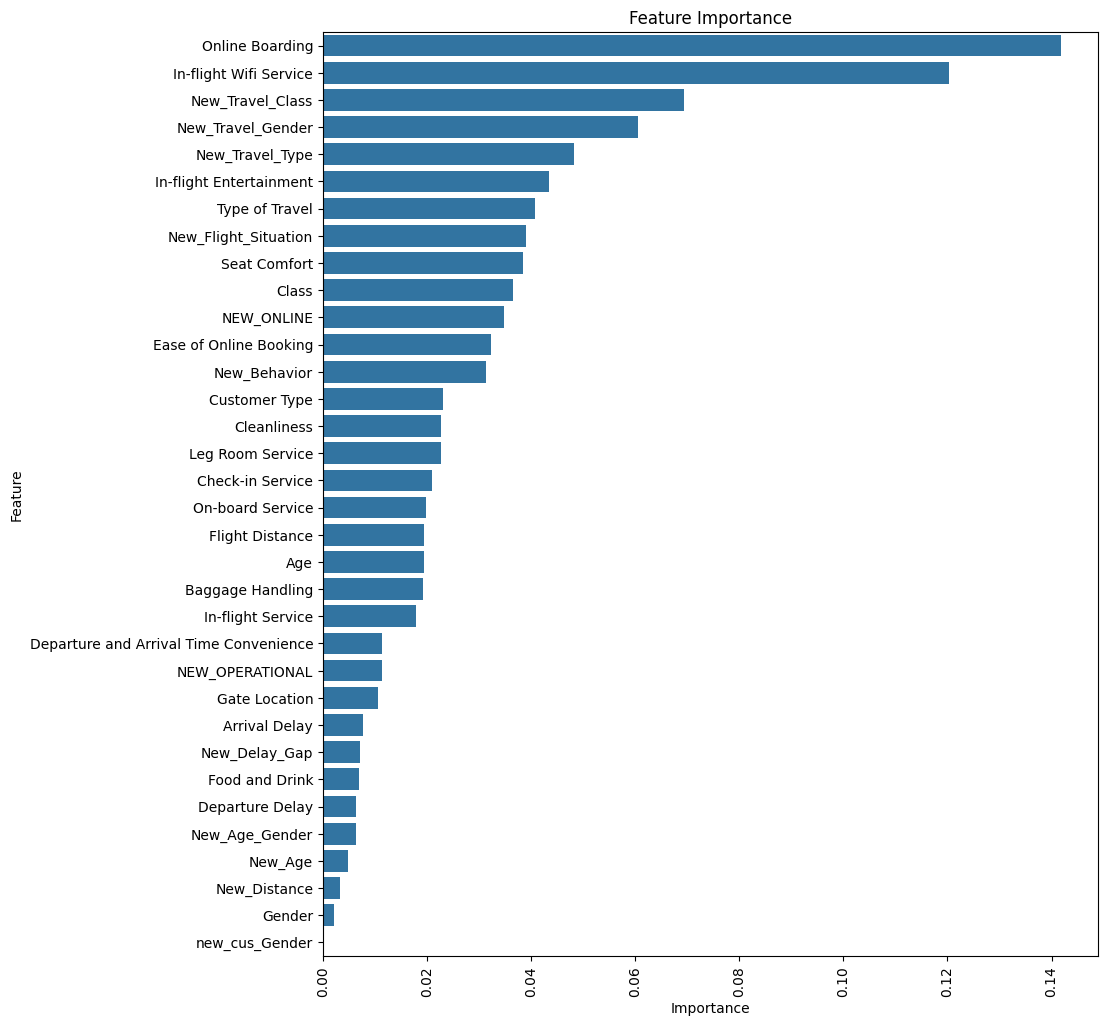

In [ ]:
# For rf is a trained RandomForest model
importances = rf.feature_importances_
feature_names = rf.feature_names_in_

# Create a DataFrame and sort by importance
sorted_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,12))
sns.barplot(x='Importance', y='Feature', data=sorted_importances)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()


In [ ]:
rf = RandomForestClassifier(max_depth=8,
                             n_estimators=1000,
                             class_weight={0:5, 1:0.6},
                             min_samples_split=50,
                             min_samples_leaf=7)

rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 5, 1: 0.6}, max_depth=8,
                       min_samples_leaf=7, min_samples_split=50,
                       n_estimators=1000)

# Prediction and Confusion matrix

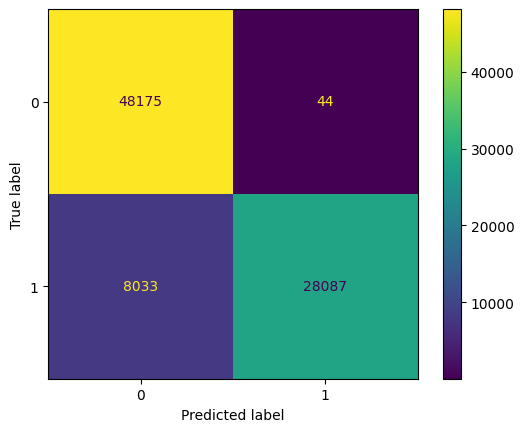

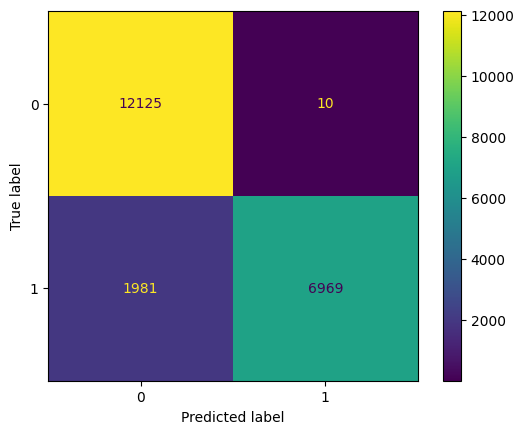

In [ ]:
tr_pred=rf.predict(x_train)
val_pred=rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1-SCORE


In [ ]:
train_f1 = f1_score(y_train,tr_pred)
val_f1 = f1_score(y_test,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.8742898943207109
val F1 Score - 0.8750078473224936


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.9055726820014228


# Classification report

In [ ]:
print('Classification report :',classification_report(y_test,val_pred))

Classification report :               precision    recall  f1-score   support

           0       0.86      1.00      0.92     12135
           1       1.00      0.78      0.88      8950

    accuracy                           0.91     21085
   macro avg       0.93      0.89      0.90     21085
weighted avg       0.92      0.91      0.90     21085



# SVM Model

In [ ]:
from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)

SVC()

# Prediction and ConfusionMatrixDisplay

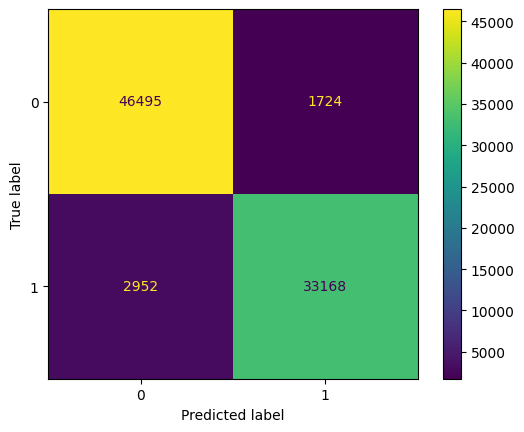

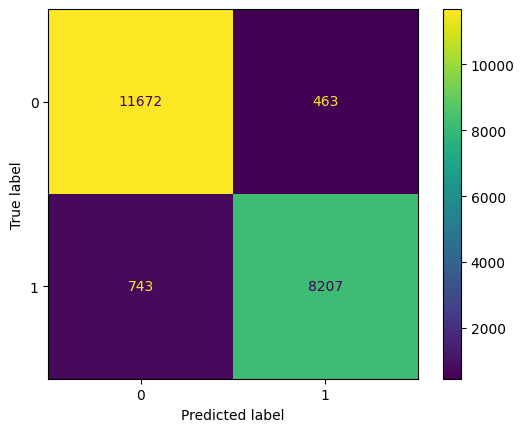

In [ ]:
tr_pred = svm.predict(x_train)
val_pred = svm.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1-Score

In [ ]:
train_f1 = f1_score(y_train,tr_pred)
val_f1 = f1_score(y_test,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.9341519743142004
val F1 Score - 0.93155505107832


# Accuracy Score

In [ ]:
# Accuracy Score
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.9428029404790135


# Classification report

In [ ]:
print('Classification report :',classification_report(y_test,val_pred))

Classification report :               precision    recall  f1-score   support

           0       0.94      0.96      0.95     12135
           1       0.95      0.92      0.93      8950

    accuracy                           0.94     21085
   macro avg       0.94      0.94      0.94     21085
weighted avg       0.94      0.94      0.94     21085



In [ ]:
svm=SVC(class_weight={0:1.2,1:1},C=0.99,degree=6,random_state=42)
svm.fit(x_train,y_train)

SVC(C=0.99, class_weight={0: 1.2, 1: 1}, degree=6, random_state=42)

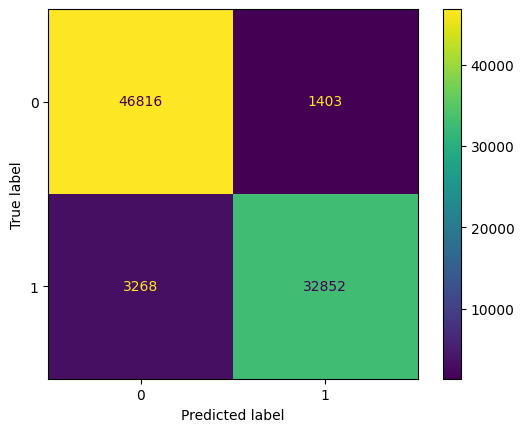

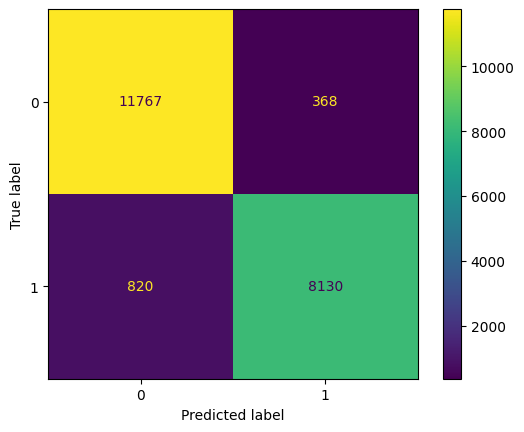

In [ ]:
tr_pred = svm.predict(x_train)
val_pred = svm.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

In [ ]:
train_f1 = f1_score(y_train,tr_pred)
val_f1 = f1_score(y_test,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.933626998223801
val F1 Score - 0.9319119669876204


In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.9436566279345506


In [ ]:
print('Classification report :',classification_report(y_test,val_pred))

Classification report :               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12135
           1       0.96      0.91      0.93      8950

    accuracy                           0.94     21085
   macro avg       0.95      0.94      0.94     21085
weighted avg       0.94      0.94      0.94     21085



# Model Comparison

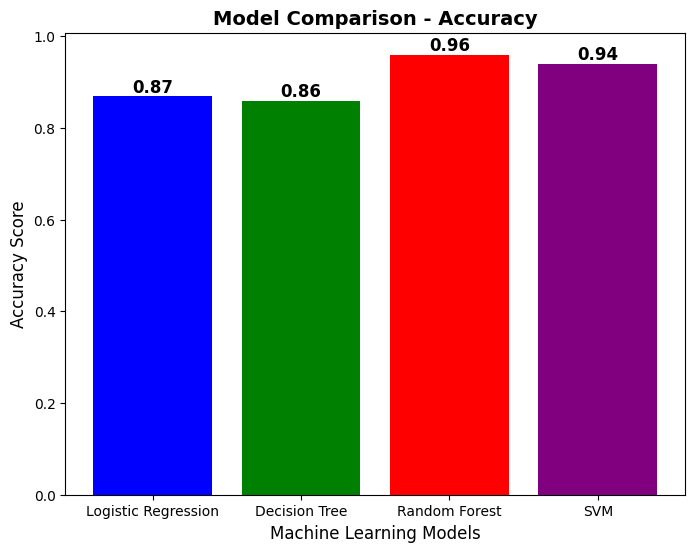

In [ ]:
# Model names and their accuracy scores
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy = [0.87, 0.86, 0.96, 0.94]
colors = ['blue', 'green', 'red', 'purple']

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracy, color=colors)

# Add labels on top of the bars
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Model Comparison - Accuracy', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=360)
plt.show()


# HyperParameter Tuning
# GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

 params_grid = {
     "n_estimators":[150,200],
     "max_depth": [4,None],
     "min_samples_split":[4,5],
     "max_features":["sqrt",7],
     "n_jobs": [-1],
     "class_weight": [{0:5,1:3}, {0:1.2, 1:0.9}, {0:5, 1:1.2}]
 }
 grid_search_cv = GridSearchCV(
     estimator=rf,
     param_grid=params_grid,
     scoring='f1',
     cv=5,
     return_train_score=True
 )

grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': [{0: 5, 1: 3}, {0: 1.2, 1: 0.9},
                                          {0: 5, 1: 1.2}],
                         'max_depth': [4, None], 'max_features': ['sqrt', 7],
                         'min_samples_split': [4, 5],
                         'n_estimators': [150, 200], 'n_jobs': [-1]},
             return_train_score=True, scoring='f1')

In [ ]:
 results_df = pd.DataFrame({
     'Parameters': grid_search_cv.cv_results_['params'],
     'MeanTrainScore': grid_search_cv.cv_results_['mean_train_score'],
     'MeanTestScore': grid_search_cv.cv_results_['mean_test_score']})

In [ ]:
results_df

,Parameters,MeanTrainScore,MeanTestScore
0,"{'class_weight': {0: 5, 1: 3}, 'max_depth': 4,...",0.866399,0.866072
1,"{'class_weight': {0: 5, 1: 3}, 'max_depth': 4,...",0.865133,0.864582
2,"{'class_weight': {0: 5, 1: 3}, 'max_depth': 4,...",0.866399,0.866072
3,"{'class_weight': {0: 5, 1: 3}, 'max_depth': 4,...",0.865133,0.864582
4,"{'class_weight': {0: 5, 1: 3}, 'max_depth': 4,...",0.872754,0.872484
5,"{'class_weight': {0: 5, 1: 3}, 'max_depth': 4,...",0.875876,0.875630
6,"{'class_weight': {0: 5, 1: 3}, 'max_depth': 4,...",0.872754,0.872484
7,"{'class_weight': {0: 5, 1: 3}, 'max_depth': 4,...",0.875876,0.875630
8,"{'class_weight': {0: 5, 1: 3}, 'max_depth': No...",0.996263,0.953507
9,"{'class_weight': {0: 5, 1: 3}, 'max_depth': No...",0.996346,0.953486


# RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=None,
                             n_estimators=200,
                             max_features = 7,
                             class_weight={0:5, 1:1.2},
                             min_samples_split=4)

rf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 5, 1: 1.2}, max_features=7,
                       min_samples_split=4, n_estimators=200)

# Prediction and Confusion matrix

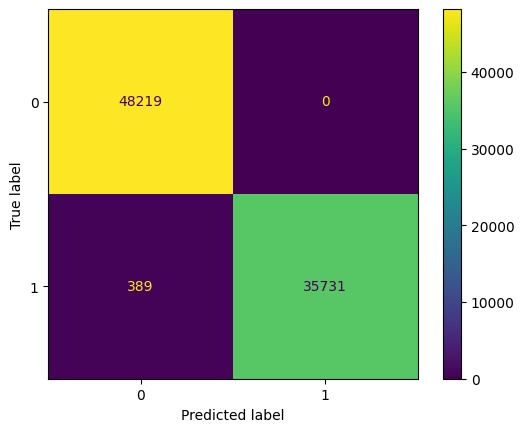

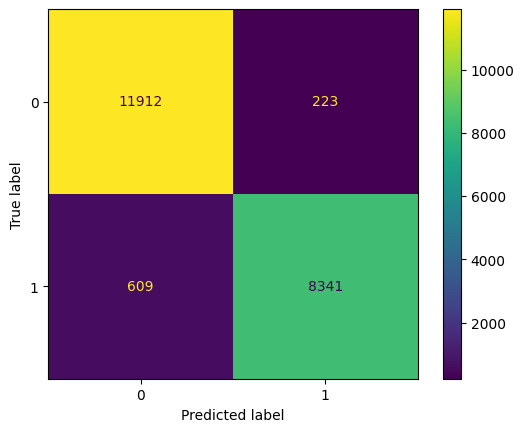

In [ ]:
tr_pred=rf.predict(x_train)
val_pred=rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_train,tr_pred)
ConfusionMatrixDisplay.from_predictions(y_test,val_pred)

# F1_score

In [ ]:
train_f1 = f1_score(y_train,tr_pred)
val_f1 = f1_score(y_test,val_pred)

print("train F1 Score - {}".format(train_f1))
print("val F1 Score - {}".format(val_f1))

train F1 Score - 0.9945860182878457
val F1 Score - 0.9524951467397511


# Accuracy Score

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,val_pred))

Accuracy Score:  0.9605406687218402


# Classification report

In [ ]:
print('Classification report :',classification_report(y_test,val_pred))

Classification report :               precision    recall  f1-score   support

           0       0.95      0.98      0.97     12135
           1       0.97      0.93      0.95      8950

    accuracy                           0.96     21085
   macro avg       0.96      0.96      0.96     21085
weighted avg       0.96      0.96      0.96     21085



# Feature_importances RandomForestClassifier

In [ ]:
feature_importances = rf.feature_importances_

feature_names = rf.feature_names_in_

sorted_idx = np.argsort(rf.feature_importances_)[::-1]

sorted_importances = [(feature_names[i], feature_importances[i]) for i in sorted_idx]

In [ ]:
sorted_importances

,Feature,Importance
19,In-flight Wifi Service,1.583736e-01
11,Online Boarding,1.401922e-01
4,Class,5.730931e-02
26,New_Travel_Gender,5.227197e-02
25,New_Travel_Type,5.127681e-02
27,New_Travel_Class,4.994978e-02
30,New_Flight_Situation,4.428973e-02
20,In-flight Entertainment,3.908838e-02
14,Seat Comfort,3.725271e-02
33,New_Behavior,3.487057e-02


In [ ]:
feature_importances = rf.feature_importances_
feature_names = rf.feature_names_in_

# Convert feature importances to percentage
feature_importances_percent = (feature_importances / np.sum(feature_importances)) * 100

sorted_idx = np.argsort(feature_importances)[::-1]

# Extract sorted feature importance with percentage
sorted_importances = [(feature_names[i], feature_importances_percent[i]) for i in sorted_idx]

# Print the results
for name, importance in sorted_importances:
    print(f"{name}: {importance:.2f}%")


In-flight Wifi Service: 15.57%
Online Boarding: 14.59%
New_Travel_Class: 5.90%
New_Travel_Type: 4.88%
New_Travel_Gender: 4.85%
Class: 4.82%
NEW_ONLINE: 4.30%
In-flight Entertainment: 4.09%
New_Flight_Situation: 3.73%
Seat Comfort: 3.48%
New_Behavior: 3.44%
Type of Travel: 2.87%
Check-in Service: 2.70%
Customer Type: 2.51%
Baggage Handling: 2.38%
Leg Room Service: 2.14%
Cleanliness: 2.11%
In-flight Service: 2.04%
Ease of Online Booking: 1.90%
On-board Service: 1.90%
Flight Distance: 1.78%
Age: 1.64%
Gate Location: 1.01%
NEW_OPERATIONAL: 1.00%
Departure and Arrival Time Convenience: 0.87%
New_Delay_Gap: 0.57%
Arrival Delay: 0.55%
New_Age_Gender: 0.54%
Food and Drink: 0.53%
Departure Delay: 0.50%
New_Age: 0.37%
New_Distance: 0.21%
new_cus_Gender: 0.11%
Gender: 0.11%


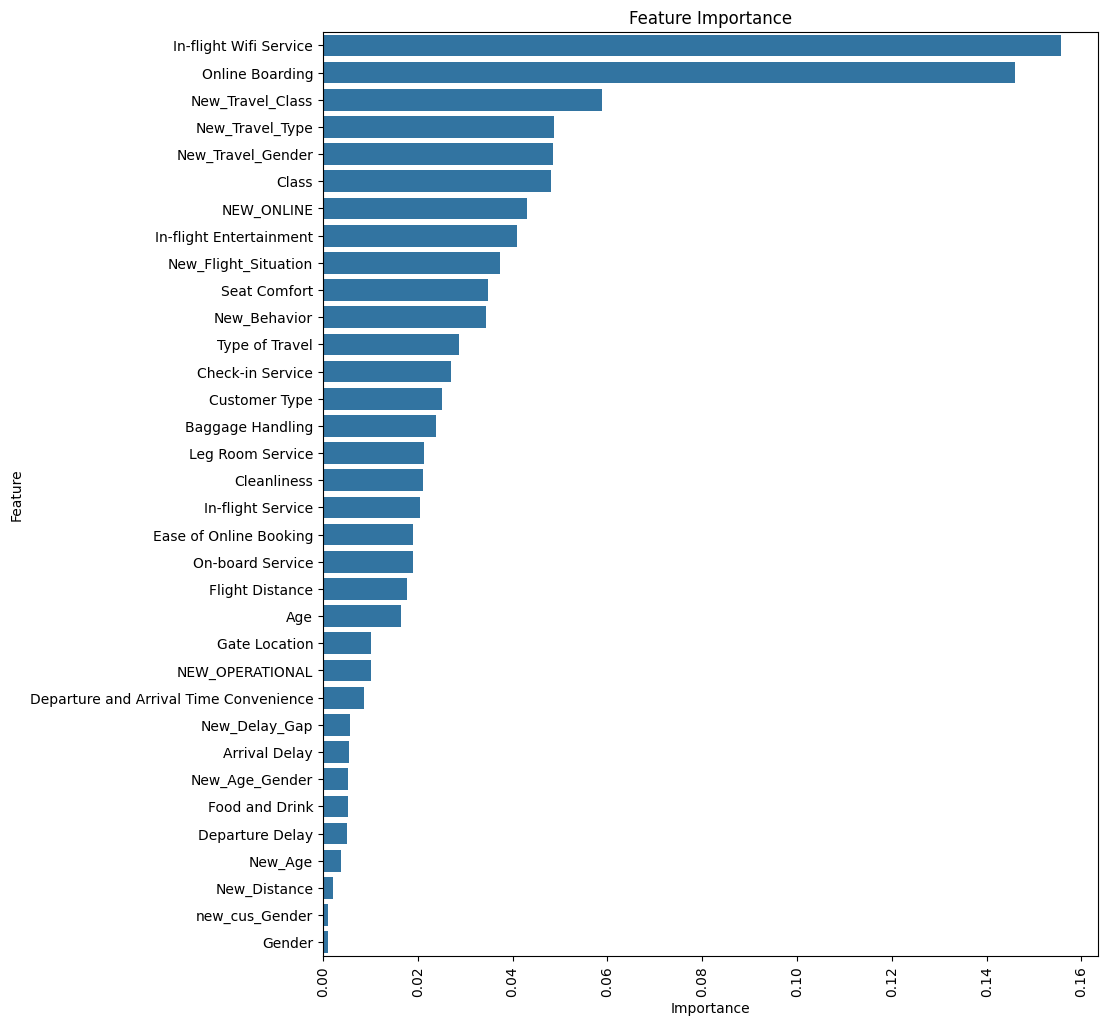

In [ ]:
# For rf is a trained RandomForest model
importances = rf.feature_importances_
feature_names = rf.feature_names_in_

# Create a DataFrame and sort by importance
sorted_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,12))
sns.barplot(x='Importance', y='Feature', data=sorted_importances)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()


# Best Model is RandomForestClassifier
      With Accuracy Score:  0.9614417832582405
      best traning and Validation F1_score :
                train F1 Score - 0.9948098570971378
                val F1 Score - 0.9535826434484728


 A precision score of 0.95 for class 0 and 0.98 for class 1 indicates that 95% and 98% of the predicted positive instances for each class were correct, respectively


 A recall score of 0.98 for class 0 and 0.93 for class 1 indicates that 98% and 93% of the actual positive instances for each class were correctly classified, respectively




 In this case "In-flight Wifi Service" has a highest importance sclore(15.57%)  indicating that it contributes the most to the models predictions,the feature with lower importance score are less influential. for instance ,"new_cus_Gender"/ "Gender" with (0.11%) , suggesting it has minimal impact on the models predictions.



* short Distance passenger have higher returning rate of with New_Distance with
                   mean and count


     Long Distance	  0.644437 /	29885


     Short Distance	 0.341691	/ 75539


  however the passenger in short distance flight are more dissatisfied with the
  flight service compared to long distance.


* Business class passenger are more satisfied with the flight service whereas economy class passenger are highly dissatisfied followed by Economy Plus class passenger. Further, business class passenger are more loyal than other class passengers.


* in-flight wifi service has the most significant impact on satisfaction, closely followed by Online boarding, class and in-flight entertainment. Similarly, demographic factors such as Seat Comfort and Type of Travel,Check-in Service also have significant influence on satisfaction levels. Therefore, airlines should tailor their services to target these specific customer demographics.



 Business class passengers have higher satisfaction and loyalty, so the airline should maintain and promote the quality of premium class offerings. This includes ensuring comfortable seats, exclusive amenities, and personalized service.


